In [3]:
# 필요한 모듈 불러오기
import numpy as np
from scipy.signal import convolve2d # 2D convolution 연산
from skimage.io import imread, imshow # 데이터를 이미지로 보여주기
from skimage.color import rgb2gray # RGB 채널값을 가진 이미지 데이터를, 흑백 이미지의 데이터로 변환하기

In [8]:
cat = rgb2gray(imread('cat.jpg')) # read image
cat.shape


(533, 800)

In [10]:
cat

array([[0.85855569, 0.84679098, 0.85855569, ..., 0.10155294, 0.09763137,
        0.09763137],
       [0.86247725, 0.85071255, 0.86639882, ..., 0.0937098 , 0.08978824,
        0.08978824],
       [0.82718314, 0.81541843, 0.83502627, ..., 0.08586667, 0.08586667,
        0.08586667],
       ...,
       [0.68252549, 0.67860392, 0.67860392, ..., 0.88600667, 0.88600667,
        0.8820851 ],
       [0.68252549, 0.67468235, 0.67860392, ..., 0.8820851 , 0.8820851 ,
        0.8820851 ],
       [0.67860392, 0.67076078, 0.67468235, ..., 0.87424196, 0.87816353,
        0.8820851 ]])

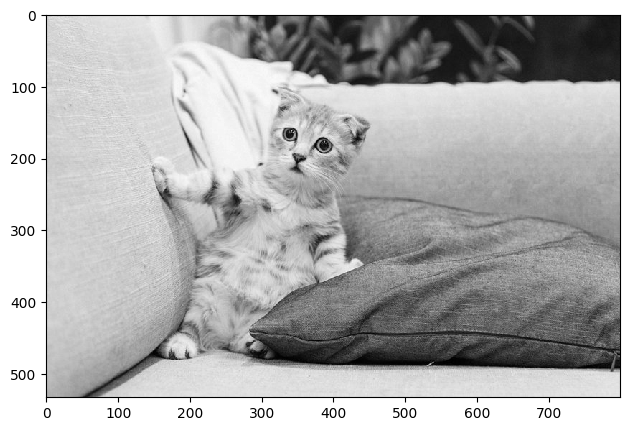

In [11]:
imshow(cat)

### 필터 정의
#### Edge Detection, Sharpen, Gaussian Blur filter

In [12]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

In [15]:
edge_im = convolve2d(cat, edge, 'valid')
sharp_im = convolve2d(cat, sharpen, 'valid')
blur_im = convolve2d(cat, blur, 'valid')


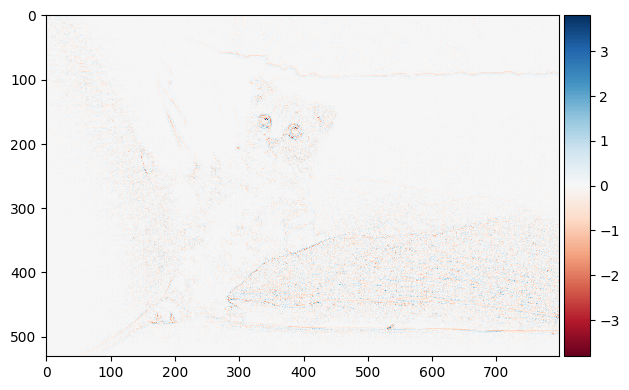

In [17]:
imshow(edge_im)

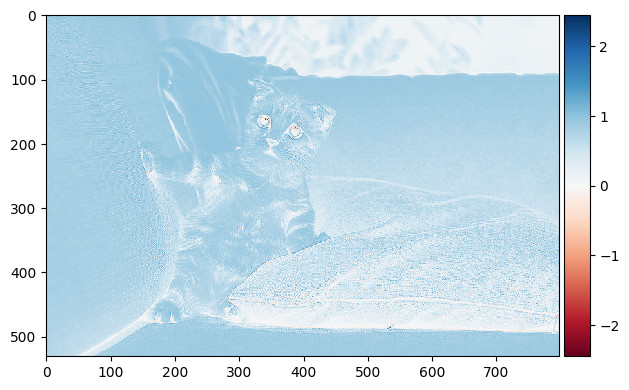

In [20]:
imshow(sharp_im)


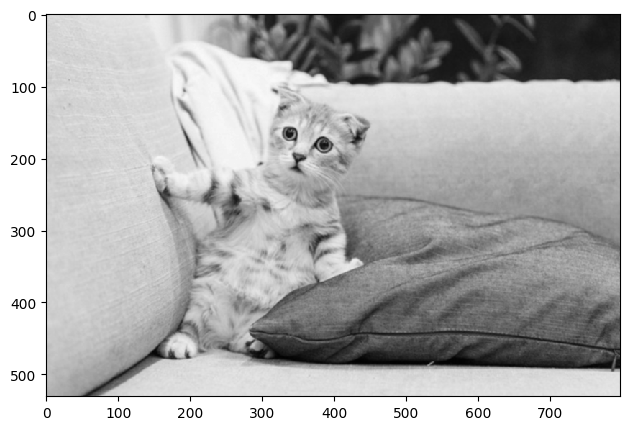

In [22]:
imshow(blur_im)


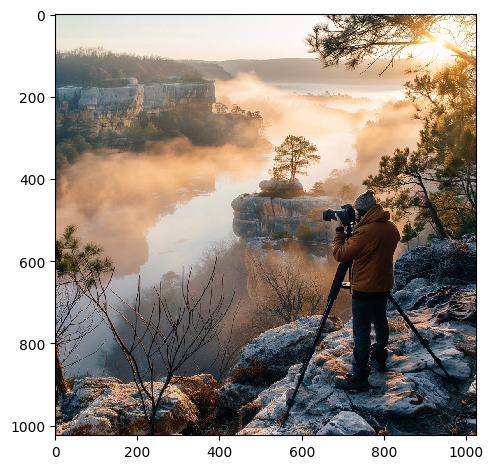

In [25]:
landscape = imread('landscape.jpg') # read image
landscape.shape

imshow(landscape)


In [ ]:
# Edge Detection
edge = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Sharpen
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Gaussian Blur
blur = (1 / 16.0) * np.array([[1., 2., 1.],
                                 [2., 4., 2.],
                                 [1., 2., 1.]])

In [ ]:
edge_im = convolve2d(landscape, edge, 'valid')
sharp_im = convolve2d(landscape, sharpen, 'valid')
blur_im = convolve2d(landscape, blur, 'valid')

imshow(edge_im)
imshow(sharp_im)
imshow(blur_im)


In [ ]:
edge_im = convolve2d(cat, edge, 'valid')
sharp_im = convolve2d(cat, sharpen, 'valid')
blur_im = convolve2d(cat, blur, 'valid')


Q. hidden layer의 개수가 늘어날수록 다양하고 복잡한 패턴을 찾을 수 있습니다. 어떻게 하면 더 많은 layer를 쌓을 수 있을까요? 어떤 방법을 사용하면 될까요?


더 많은 layer를 쌓을 수 있는 해결책은 padding을 사용하는 것입니다. padding은 Filter을 적용하기 전에 보존하려는 Feature map 크기에 맞게 입력 Feature Map의 좌우 끝과 상하 끝에 각각 열과 행을 추가한 뒤, 0 값을 채워 입력 Feature map 사이즈를 증가시킵니다.

이런 식으로 padding을 적용하면 깊은 layer를 쌓을 수 있습니다.


Q. 딥러닝을 이용한 이미지 분석의 핵심을 한 문장으로 요약하여 적어보세요.

   
자동패턴 추출기인 필터 또는 커널을 학습시키는것


# ch. 4-2. Channel이 3개일 때, 1-Layer의 Convolution 연산


Q. 7 x 7 x 3의 input에 3x3의 kernel, stride 1인 Convolution 연산을 하면 output의 크기는 어떻게 되나요? feature map의 크기는 어떻게 되나요? 
kernel은 input의 channel 수만큼 존재하고, 각 channel 수준에서 Convolution 2D 연산을 계속하면 channel 수만큼의 output이 생깁니다. 따라서 output은 5 x 5 x 3이 나옵니다.

filter 1개로 feature map 1개를 만들 수 있습니다. 3개의 output의 동일한 위치의 숫자를 더하고 거기에 1번 filter의 bias를 더하여 1번 filter의 5 x 5 feature map을 만들 수 있습니다. 즉 “(5 x 5) x 3”개의 칸에 같은 값(bias)이 더해져 feature map을 만듭니다.

### 4-4

Q. 1x1 Convolution을 사용하면 연산량을 매우 쉽게 줄일 수 있습니다. 계산량이 실제로 줄어드는지 예시 2개를 풀어보고, 두 개의 값을 비교하여 생각해 보세요.

[예시 1] 28x28x192 image 데이터에 (5x5 filter, kernel_size=32) convolution 연산을 적용한다고 해 봅시다. 이때, feature map의 크기와 파라미터 수에 대해서 생각해 보세요.
[예시 2] 28x28x192 image 데이터에 (1x1 filter, kernel_size=16) convolution 연산을 사용하여 channel을 줄인 뒤, 이어서 (5x5 filter, kernel_size=32) convolution 연산을 적용 한다고 해 봅시다. 이때, feature map의 크기와 파라미터 수에 대해서 생각해 보세요.


예시 1의 feature map의 크기는 24x24x32가 나옵니다. 파라미터 수(연산량)는 28 x 28 x 32 x 5 x 5 x 192 = 120,422,400 약 1.2억 번의 연산이 필요합니다.

예시 2의 feature map의 크기도 24x24x32가 나옵니다. 먼저, 1x1 filter를 사용해서 크기를 줄일 때 사용되는 파라미터 수(연산량)는 28 x 28 x 16 x 1 x 1 x 192 = 2,408,448 약 240만 번의 연산이 필요합니다. 다시 5x5 filter를 사용하면 28 x 28 x 32 x 5 x 5 x 16 = 10,035,200 약 1000만 번의 연산이 필요합니다. 그럼 총 약 1240만 번의 연산이 필요합니다.

예시 1과 예시 2의 파라미터 수(연산량)는 1.2억 번(12000만 번) 과 1240만 번의 연산으로 10배 가까이 차이 나는 것을 확인할 수 있습니다. 실제로 1x1 convolution은 연산량의 문제를 회피하면서도 channel size를 원하는 대로 변경하는 데에 도움을 줍니다. 직접 수치로 비교하니 더 이해가 잘 되지 않나요? 

필터 갯수와 필터 채널 수의 차이점
| 구분 | 필터 채널 수 (Filter Channels) | 필터 갯수 (Number of Filters) |
|----------------------|-----------------------------------------------|------------------------------------------------------|
| 정의 | 각 필터가 가지는 채널의 수 | 필터의 총 개수 |
| 관계 | 입력 데이터의 채널 수와 동일 | 출력 Feature Map의 채널 수를 결정 |
| 역할 | 입력 데이터의 모든 채널을 동시에 처리하여 특징 추출 | 모델이 학습할 수 있는 특징의 수를 결정 |
| 예시 | 입력이 3채널(RGB)이라면 필터도 3채널 | 필터가 32개면 출력 Feature Map은 32채널 |
| 영향 | 필터의 깊이를 정의하여 입력의 각 채널에서 정보를 추출 | 필터의 수가 증가하면 모델의 표현력과 복잡도가 증가 |

# 5-4. CNN 구조 구현하기

In [26]:
import tensorflow as tf
# 가로 28, 세로 28, 채널 수 1의 input 데이터를 받는 input layer 생성하기
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) 

# 커널의 가로 세로 사이즈는 3이고, 필터 수는 4, zero-padding을 넣고,
# stride는 1로 한 Conv2D layer
x = tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=1, padding='same', activation='relu')(input_layer)

print(type(x))
print(x)

<class 'keras.src.backend.common.keras_tensor.KerasTensor'>
<KerasTensor shape=(None, 28, 28, 4), dtype=float32, sparse=False, name=keras_tensor_1>


In [27]:
print(input_layer.shape)
print(x.shape)

(None, 28, 28, 1)
(None, 28, 28, 4)


# pooling layer가 포함된 CNN 모델 구현


이번에는 pooling layer가 포함된 CNN 모델을 만들어봅시다.
(27, 27, 1) 크기의 입력을 받는 input_tensor와 Conv2D 레이어 x1, 그리고 pooling layer에 해당하는 MaxPooling2D 레이어 x2로 구성되어 있습니다.

In [29]:
# Q. 가로 27, 세로 27, 채널 수 1의 input 데이터를 받는 input layer 생성해 보세요.
input_tensor = tf.keras.layers.Input(shape=(27, 27, 1))


In [30]:
# Q. 커널의 가로 세로 사이즈는 2이고, 채널 수는 6, zero-padding을 넣고,
# stride는 2인 Conv2D layer x1을 생성해 보세요. (활성화 함수 : relu)
x1 = tf.keras.layers.Conv2D(filters=6, kernel_size=2, strides=2, padding='same', activation='relu')(input_tensor)

# 가로 세로 사이즈가 2인 영역에서 최대값을 뽑는 Maxpooling을 적용
x2 = tf.keras.layers.MaxPooling2D(2)(x1) 
print(x1)
print(x2)

<KerasTensor shape=(None, 14, 14, 6), dtype=float32, sparse=False, name=keras_tensor_3>
<KerasTensor shape=(None, 7, 7, 6), dtype=float32, sparse=False, name=keras_tensor_4>


In [33]:
input_layer = tf.keras.layers.Input(shape=(7, 7, 5))
convlayer1 = tf.keras.layers.Conv2D(filters=4, kernel_size=3, strides=1, padding='same')(input_layer)
convlayer2 = tf.keras.layers.Conv2D(filters=8, kernel_size=3, strides=1, padding='valid')(convlayer1)
pooling = tf.keras.layers.MaxPooling2D(2)(convlayer2)

model = tf.keras.Model(inputs=input_layer, outputs=pooling)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 7, 7, 5)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 4)        │           184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 5, 5, 8)        │           296 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 2, 2, 8)        │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 480 (1.88 KB)

 Trainable params: 480 (1.88 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
input_layer = tf.keras.layers.Input(shape=(13, 13, 5))
convlayer1 = tf.keras.layers.Conv2D(filters=8, kernel_size=5, strides=2, padding='valid')(input_layer)
convlayer2 = tf.keras.layers.Conv2D(filters=16, kernel_size=5, strides=2, padding='valid')(convlayer1)
pooling = tf.keras.layers.MaxPooling2D(2)(convlayer2)

model = tf.keras.Model(inputs=input_layer, outputs=pooling)
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 13, 13, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 5, 5, 8)        │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 1, 1, 16)       │         3,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 0, 0, 16)       │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,224 (16.50 KB)

 Trainable params: 4,224 (16.50 KB)

 Non-trainable params: 0 (0.00 B)

# 이미지 분류 CNN 모델


CNN 모델을 이미지 분류에 사용하려면, Conv2D 레이어의 output인 3차원 feature map에 flatten을 적용한 다음, fully connected layer(Dense)를 연결해야 합니다.

In [35]:
input_tensor = tf.keras.layers.Input(shape=(28, 28, 1))
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu')(input_tensor) 
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

# 3차원으로 되어있는 Feature map 결과를 Fully Connected 연결하기 위해서는 Flatten()을 적용해야 합니다.
x = tf.keras.layers.Flatten()(x) 

# Flatten 된 결과를 100의 노드를 가진 Fuly Connected Layer와 연결 
x = tf.keras.layers.Dense(100, activation='relu')(x) 
output = tf.keras.layers.Dense(10, activation='softmax')(x)

model = tf.keras.Model(inputs=input_tensor, outputs=output)
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 26, 26, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 10816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     1,081,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,101,526 (4.20 MB)

 Trainable params: 1,101,526 (4.20 MB)

 Non-trainable params: 0 (0.00 B)

- 입력채널수 = 필터채널수(설정할 필요 없음) 
- 필터 개수 = feature map 채널 수
- filters=32(필터수), kernel_size=3 (3x3을 의미) 


# 모델 예시:


In [37]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Input layer
input_tensor = tf.keras.layers.Input(shape=(27, 27, 1))

# 첫 번째 Convolution 레이어
x = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(input_tensor)
x = MaxPooling2D(pool_size=(2, 2))(x)

# 두 번째 Convolution 레이어
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten 레이어
x = Flatten()(x)

# Dense 레이어
x = Dense(units=128, activation='relu')(x)

# 출력 레이어
output = Dense(units=10, activation='softmax')(x)  # 예: 10개 클래스 분류

# 모델 생성
model = Model(inputs=input_tensor, outputs=output)

# 모델 요약 출력
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 27, 27, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 25, 25, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# pooling 효과
- 특징 맵의 크기를 줄여 계산량과 메모리 사용을 감소  
- 중요한 특징만을 추출하여 모델이 훈련 데이터에 과도하게 적응하는 것을 막아 과적합 방지  
- 이미지의 작은 이동이나 왜곡에도 강인한 특징을 유지  
- 입력 데이터의 노이즈를 줄여 더 안정적인 학습을 지원